# Linear Regression

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df=pd.read_csv('Rent Data.csv')

In [3]:
df.info()
#int64 --> integer Data 
#float64 --> float data 
#obj --> Strings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    30 non-null     int64
 1   rent    30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [4]:
#df.isnull()
df.isnull().sum()

area    0
rent    0
dtype: int64

In [5]:
df.columns

Index(['area', 'rent'], dtype='object')

In [6]:
df.rent.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [7]:
df['rent'].head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [8]:
#Descriptive statistics
df.describe()

,area,rent
count,30.000000,30.000000
mean,2287.333333,37192.000000
std,544.261178,11827.977762
min,1200.000000,20000.000000
25%,1925.000000,31115.000000
50%,2130.000000,34300.000000
75%,2700.000000,47750.000000
max,3500.000000,70000.000000


Text(0.5, 1.0, 'Home Prices in Dhanmondi')

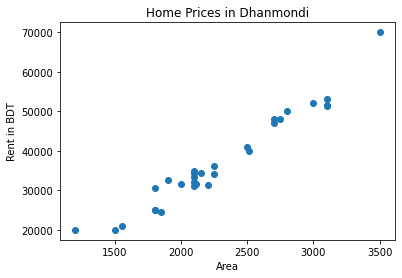

In [9]:
#Vizualization
plt.scatter(df.area , df.rent) # x = df.area , y = df.rent
plt.xlabel('Area')
plt.ylabel('Rent in BDT')
plt.title('Home Prices in Dhanmondi')

Text(0.5, 1.0, 'Home Prices in Dhanmondi')

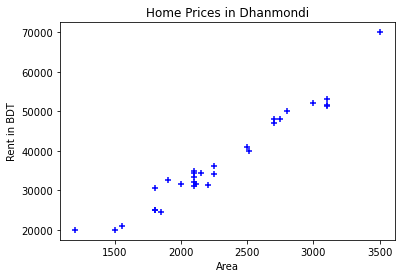

In [10]:
# https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.scatter.html
#Vizualization
plt.scatter(df.area , df.rent, c ="blue",marker='+') # x = df.area , y = df.rent , marker="d"
plt.xlabel('Area')
plt.ylabel('Rent in BDT')
plt.title('Home Prices in Dhanmondi')

In [11]:
df.area.mean()

2287.3333333333335

In [12]:
df.rent.mean()

37192.0

In [13]:
x = df[['area']] # x=df.drop('rent',axis=1)
y = df['rent']

In [14]:
x.shape

(30, 1)

# split data set into train test dataset

In [15]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(df[['area']] , df.rent, train_size=.70) #x=df.drop('rent',axis=1); y = df['rent']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=1) #x=df.drop('rent',axis=1); y = df['rent']

In [16]:
xtest.shape

(9, 1)

In [17]:
ytest.shape

(9,)

In [18]:
ytrain.shape

(21,)

In [19]:
xtrain.shape

(21, 1)

In [20]:
ytrain # y for training

22    70000
23    20000
4     52100
2     41050
25    53000
6     20000
18    25000
13    40050
7     24500
27    25000
1     35000
16    30500
0     31500
15    51500
29    51400
28    31460
9     31000
8     48000
12    34500
11    32000
5     32500
Name: rent, dtype: int64

In [21]:
xtrain # x for training

,area
22,3500
23,1200
4,3000
2,2500
25,3100
6,1500
18,1800
13,2510
7,1850
27,1800


# Linear Regression

In [22]:
#https://scikit-learn.org/stable/modules/linear_model.html
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression 

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(xtrain, ytrain) #x,y - training done

LinearRegression()

In [25]:
m=lr.coef_

In [26]:
c=lr.intercept_
c

-10419.456038766926

In [27]:
x1 = 2500
y = m*x1 + c

In [28]:
y

array([41648.33883269])

In [29]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [30]:
lr.predict([[2500]])

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41648.33883269])

In [31]:
#41648.33883269

In [32]:
df['Predicted Values'] = lr.predict(x)

In [33]:
df.head(10)

,area,rent,Predicted Values
0,2000,31500,31234.779858
1,2100,35000,33317.491653
2,2500,41050,41648.338833
3,2250,36100,36441.559346
4,3000,52100,52061.897807
5,1900,32500,29152.068064
6,1500,20000,20821.220884
7,1850,24500,28110.712166
8,2700,48000,45813.762422
9,2100,31000,33317.491653


In [34]:
lr.score(xtest, ytest)

0.9749085778555686

In [35]:
lr.score(xtrain , ytrain)

0.9455858215662483

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(df.rent, df['Predicted Values'] ) #total

In [38]:
mse

6671289.439234466

In [39]:
pred = lr.predict(xtest)
pred

array([21862.57678154, 33317.49165326, 34358.84755069, 45813.76242241,
       36441.55934555, 33525.76283275, 46855.11831984, 36441.55934555,
       47896.47421727])

In [40]:
mse = mean_squared_error(ytest, pred) #testing error
mse

1960364.9327864896

In [41]:
pred2 = lr.predict(xtrain)
pred2

array([62475.45678128, 14573.08549953, 52061.89780699, 41648.33883269,
       54144.60960184, 20821.22088411, 27069.35626868, 41856.61001218,
       28110.71216611, 27069.35626868, 33317.49165326, 27069.35626868,
       31234.7798584 , 54144.60960184, 54144.60960184, 35400.20344812,
       33317.49165326, 45813.76242241, 33317.49165326, 33317.49165326,
       29152.06806354])

In [42]:
mse = mean_squared_error(ytrain, pred2) #training error
mse

8690257.084855027

# Best Fit Line

Text(0.5, 1.0, 'Home Prices in Dhanmondi')

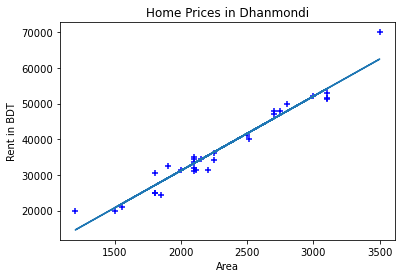

In [43]:
plt.plot(df.area , lr.predict(x))
plt.scatter(df.area , df.rent, c ="blue",marker='+') # x = df.area , y = df.rent , marker="d"
plt.xlabel('Area')
plt.ylabel('Rent in BDT')
plt.title('Home Prices in Dhanmondi')

In [44]:
df.area.mean()

2287.3333333333335

In [45]:
df.rent.mean()

37192.0

In [47]:
lr.predict([[3000]])

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52061.89780699])

In [ ]:
# 52061.89780699

# Save ML Models

In [48]:
import pickle as pk

In [51]:
with open('My_LR1','wb') as files:
    pk.dump(lr, files)

In [52]:
import pickle as pk

with open('My_LR1','rb') as files:
    lr1 = pk.load(files)

In [53]:
lr1.predict([[3000]])

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52061.89780699])

In [54]:
pk.dump(lr,open('My2','wb'))

In [55]:
lr2 = pk.load(open('My2','rb'))

In [56]:
lr2.predict([[3000]])

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52061.89780699])

# Joblib

In [57]:
import joblib as jb
jb.dump(lr,'Job3')

['Job3']

In [58]:
lr4 = jb.load('Job3')

In [59]:
lr4.predict([[3000]])

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52061.89780699])

In [62]:
xtrain

,area
22,3500
23,1200
4,3000
2,2500
25,3100
6,1500
18,1800
13,2510
7,1850
27,1800


In [63]:
xtrain.to_csv('xtrain')

In [65]:
df.to_csv('newdf.csv')

In [66]:
train, test = train_test_split(df, train_size=.70,random_state=1) #x=df.drop('rent',axis=1); y = df['rent']

In [67]:
train

,area,rent,Predicted Values
22,3500,70000,62475.456781
23,1200,20000,14573.085500
4,3000,52100,52061.897807
2,2500,41050,41648.338833
25,3100,53000,54144.609602
6,1500,20000,20821.220884
18,1800,25000,27069.356269
13,2510,40050,41856.610012
7,1850,24500,28110.712166
27,1800,25000,27069.356269


In [68]:
train.shape

(21, 3)

In [69]:
train.to_csv('Train.csv')

In [70]:
train = pd.read_csv('Train.csv')

In [73]:
train.drop('Unnamed: 0',axis=1)

,area,rent,Predicted Values
0,3500,70000,62475.456781
1,1200,20000,14573.085500
2,3000,52100,52061.897807
3,2500,41050,41648.338833
4,3100,53000,54144.609602
5,1500,20000,20821.220884
6,1800,25000,27069.356269
7,2510,40050,41856.610012
8,1850,24500,28110.712166
9,1800,25000,27069.356269


In [75]:
train.drop(['Predicted Values','Unnamed: 0'],axis=1)

,area,rent
0,3500,70000
1,1200,20000
2,3000,52100
3,2500,41050
4,3100,53000
5,1500,20000
6,1800,25000
7,2510,40050
8,1850,24500
9,1800,25000
